Making Dataset

In [4]:
!pip3 install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
  import torch
  import numpy as np
  import matplotlib.pyplot as plt
  import torch.nn as nn
  from sklearn import datasets

In [6]:
n_pts = 500 # number of points
# X points
# y labels
#noise of 0 means perfect circular shape, more noise means more cluster shape like
# factor 1 means two circles of the same size
# diameter of one circle is 20% percent of the other circle
X, y = datasets.make_circles(n_samples=n_pts, random_state =123, noise=0.1, factor=0.2)
# print(X)
# print(y) 

# We need this date in form of tensors
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(n_pts, 1))


In [7]:
def scatter_plot():
  # scatter plot
  # prendiamo rispettivamente tutti i punti con label 0, segue quindi l'indice 0 per la componente dell'asse x, 1 per per quella y
  plt.scatter(X[y==0, 0], X[y==0, 1])
  # ripetiamo per i punti di etichetta 1
  plt.scatter(X[y==1, 0], X[y==1, 1])

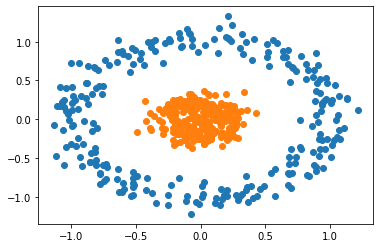

In [8]:
scatter_plot()

Deep Neureal Network Model

Cross Entropy to obtain the value of the total error

In [9]:
# extend nn.Module
class Model(nn.Module):
  # H1 hidden layer
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [10]:
 torch.manual_seed(2)
 model = Model(2,4,1)
 print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [11]:
criterion = nn.BCELoss()
# Combination of two stochastic gradient descent:Adagrad and RMSprop
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
# too smal lr means a very convergence towards the minimum
# too large can hinder the convergence
# adam compute adaptive learning rates for each parameter
# lr=0.01 is too long as shown on the loss plot

In [12]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  # print(y_pred.size())
  # print(y_data.size())
  loss = criterion(y_pred, y_data)
  print("epoch: ", i, "loss", loss.item())
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  0 loss 0.7148520350456238
epoch:  1 loss 0.6947316527366638
epoch:  2 loss 0.6955162286758423
epoch:  3 loss 0.7014890313148499
epoch:  4 loss 0.7013982534408569
epoch:  5 loss 0.697470486164093
epoch:  6 loss 0.693925678730011
epoch:  7 loss 0.6928598284721375
epoch:  8 loss 0.6939383149147034
epoch:  9 loss 0.6954388618469238
epoch:  10 loss 0.6958757042884827
epoch:  11 loss 0.6949177384376526
epoch:  12 loss 0.6931492686271667
epoch:  13 loss 0.6913899183273315
epoch:  14 loss 0.6901613473892212
epoch:  15 loss 0.6894590258598328
epoch:  16 loss 0.688843309879303
epoch:  17 loss 0.6877669095993042
epoch:  18 loss 0.6859007477760315
epoch:  19 loss 0.6832481622695923
epoch:  20 loss 0.6800420880317688
epoch:  21 loss 0.6765591502189636
epoch:  22 loss 0.6729681491851807
epoch:  23 loss 0.6692698001861572
epoch:  24 loss 0.6653285622596741
epoch:  25 loss 0.6609662771224976
epoch:  26 loss 0.6560585498809814
epoch:  27 loss 0.6505835056304932
epoch:  28 loss 0.644602596759796

Text(0.5, 0, 'epoch')

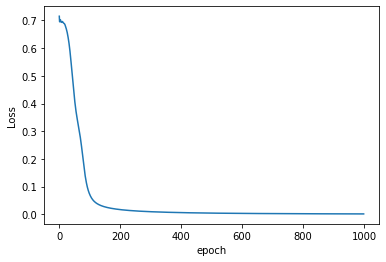

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

Model Testing

In [18]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:,0]) + 0.25) #,3) three only components
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:,1]) + 0.25)
  
  xx, yy = np.meshgrid(x_span, y_span) #to create a cartesian grid to cover the dataset
  # take n times (50,3,..) the x_span raws (xx), take n times y_span columns (yy)
  # print(x_span)
  # print(y_span)
  
  # making them one dimensional with ravel, so we can have all the combination of x and y
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  # we use detach to exclude any sub graph from gradient computation that would be asssociated with the values form pred_func 
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx,yy,z)

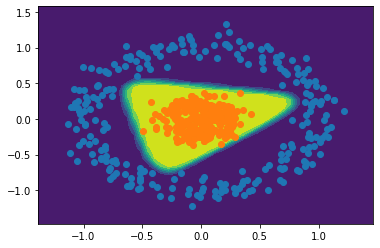

In [19]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


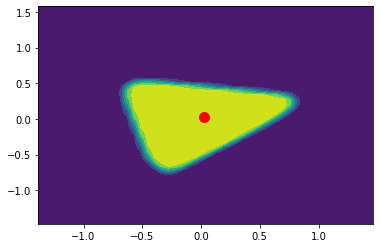

In [20]:
x = 0.025
y = 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is", prediction)
plot_decision_boundary(X,y)
